## Изучение данных из файла

In [1397]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
!pip install -U seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10.7,6)})

import warnings
warnings.simplefilter(action='ignore')

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


Прочитаем данные из файла, сохраним их в датафрейми посмотрим их описание

In [1398]:
raw_df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df = raw_df.copy()

Посмотрим сколько пропущенных значений в ячейках

In [1399]:
df.isna().mean().apply("{:.1%}".format)

total_images             0.0%
last_price               0.0%
total_area               0.0%
first_day_exposition     0.0%
rooms                    0.0%
ceiling_height          38.8%
floors_total             0.4%
living_area              8.0%
floor                    0.0%
is_apartment            88.3%
studio                   0.0%
open_plan                0.0%
kitchen_area             9.6%
balcony                 48.6%
locality_name            0.2%
airports_nearest        23.4%
cityCenters_nearest     23.3%
parks_around3000        23.3%
parks_nearest           65.9%
ponds_around3000        23.3%
ponds_nearest           61.6%
days_exposition         13.4%
dtype: object

Видим достаточно  большое число пропусков в 12 колонках.


Посмотрим сколько места занимают наши данные и какие типы используются

In [1400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим на статиститки по различным колонкам датафрейма

In [1401]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Отрицательных значений нет, что уже хорошо, но наблюдаются экстремальные значения

Посмотрим на несколько случайных значений из датафрейма

In [1402]:
df.sample(10, random_state=42)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7944,14,2990000.0,35.0,2019-03-29T00:00:00,1,NaN,17.0,16.0,10,NaN,...,9.0,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7539,8,3790000.0,33.0,2018-12-18T00:00:00,1,2.50,7.0,18.0,2,NaN,...,5.6,NaN,Санкт-Петербург,27455.0,8621.0,1.0,217.0,0.0,NaN,90.0
9889,1,12990000.0,191.0,2017-08-31T00:00:00,7,3.30,5.0,136.1,2,NaN,...,16.0,0.0,Санкт-Петербург,26856.0,5704.0,0.0,NaN,1.0,1017.0,77.0
649,1,7210000.0,61.5,2018-10-02T00:00:00,3,2.92,5.0,43.2,4,NaN,...,5.7,1.0,Санкт-Петербург,25407.0,3982.0,1.0,483.0,0.0,NaN,89.0
13768,10,550000.0,36.0,2017-08-22T00:00:00,1,NaN,2.0,20.0,1,NaN,...,8.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,92.0
12927,6,5800000.0,52.3,2017-06-12T00:00:00,2,NaN,12.0,30.5,8,NaN,...,10.3,0.0,Санкт-Петербург,36811.0,9487.0,1.0,307.0,0.0,NaN,17.0
4449,13,4400000.0,62.0,2017-11-16T00:00:00,2,NaN,12.0,33.0,4,NaN,...,14.0,NaN,Санкт-Петербург,31481.0,12074.0,0.0,NaN,0.0,NaN,68.0
16651,11,5550000.0,64.5,2016-09-21T00:00:00,3,NaN,9.0,39.0,7,NaN,...,8.0,0.0,Санкт-Петербург,18870.0,13679.0,1.0,492.0,0.0,NaN,362.0
4771,12,9990000.0,117.1,2015-07-09T00:00:00,5,NaN,4.0,NaN,4,NaN,...,NaN,NaN,Санкт-Петербург,21465.0,1404.0,1.0,378.0,2.0,103.0,946.0
12731,20,5350000.0,65.2,2018-10-11T00:00:00,3,NaN,9.0,40.0,4,NaN,...,8.5,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,186.0


### Вывод

Что мы обнаружили после загрузки данных:
* всего около 23000 записей и 22 колонки
* данные занимают 3 Мб
* присутствуют пропущенные значения в 12 колонках
* есть экстремальные значения в колонках
* дата имеет неверный формат
* излишнее использование float64 вместо int

## Предобработка данных

Начнем с пропусков данных в колонке ceiling_height. Построим гистограмму 

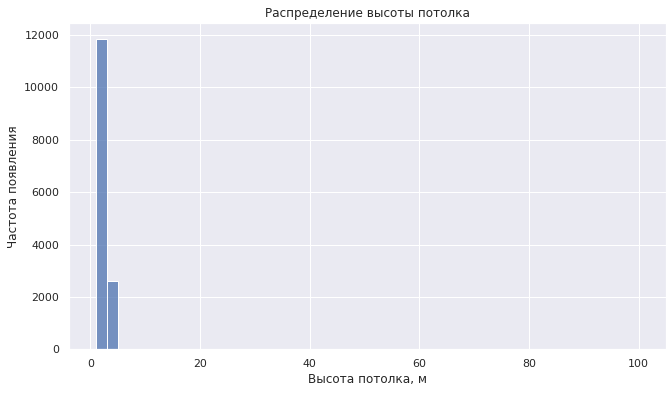

In [1403]:
ax = sns.histplot(data=df, 
                  x='ceiling_height', 
                  bins=50)
ax.set(xlabel='Высота потолка, м', ylabel='Частота появления', title='Распределение высоты потолка')
plt.show()

Явно присутствуют нереалистичные выбросы. Посмотрим на гистограмму со значениями потолка выше 4.5 метров и ниже 2

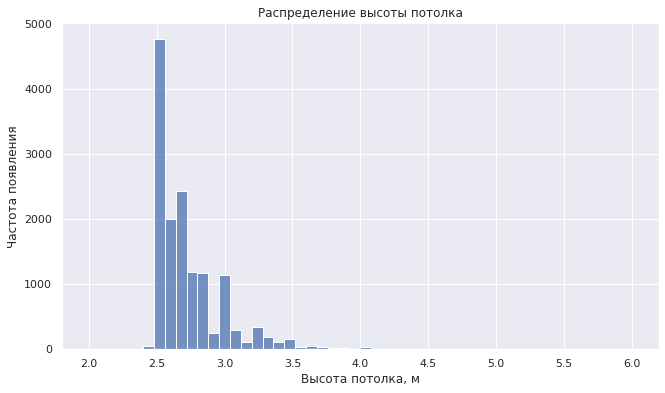

In [1404]:
ax = sns.histplot(data=df, 
                  x='ceiling_height', 
                  bins=50,
                  binrange=(2, 6))
ax.set(xlabel='Высота потолка, м', ylabel='Частота появления', title='Распределение высоты потолка')
plt.show()

Заменим пропущенные значения на -1 для того чтобы не потерять строки при дальнейшем анализе

In [1405]:
df['ceiling_height'] = df['ceiling_height'].fillna(-1)

Посмотрим на пропуски данных в колонке floors_total

In [1406]:
df.query('floors_total.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,-1.0,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,-1.0,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,-1.0,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,-1.0,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,-1.0,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,-1.0,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,-1.0,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,-1.0,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Таких значений немного, заменим пропуски в колонке на floors_total -1

In [1407]:
df['floors_total'] = df['floors_total'].fillna(-1)
df['ceiling_height'].isna().mean()

0.0

Посмотрим на пропуски в колонке living_area

In [1408]:
df.query('living_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,-1.00,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,-1.00,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,-1.00,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,-1.00,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,-1.00,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Вероятно, пользователи указали общую площадь и по причине забывчивости или лени не указали жилую площадь недвижимости. Проверим это предположение.

In [1409]:
df.query('living_area.isna() and total_area.notna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,-1.00,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,-1.00,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,-1.00,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,-1.00,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,-1.00,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Верно, у всей недвижимости с неуказанной жилой площадью указана общая площадь. Заменим пропущенные значения в колонке living_area на -1

In [1410]:
df['living_area'] = df['living_area'].fillna(-1)
df['living_area'].isna().mean()

0.0

Посмотрим на пропуски в колонке 'is_apartment'

In [1411]:
df.query('is_apartment.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,-1.00,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,-1.00,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,-1.00,14.0,-1.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,-1.00,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,-1.00,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,-1.0,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [1412]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

По какой-то причине клиенты не указали, относится недвижимость к апартаментам или нет. Вероятнее всего такая недвижимость не является апартаментами, поэтому заменим пропущенные значения на False

In [1413]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().mean()

0.0

Посмотрим на пропуски в колонке kitchen_area

In [1414]:
df.query('kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,-1.00,14.0,-1.0,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,-1.00,9.0,-1.0,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,-1.0,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,-1.00,22.0,-1.0,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,-1.00,13.0,-1.0,13,False,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,-1.0,1,False,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,-1.0,2,False,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,-1.00,9.0,-1.0,4,False,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Проверим, не являются ли такие квартиры студиями

In [1415]:
df.query('kitchen_area.isna()')['studio'].value_counts()

False    2129
True      149
Name: studio, dtype: int64

Предположение не подтвердилось, видимо клиенты по какой-то причине не указали площадь кухни.

Для замены пропущенных значения разобьем общую площадь на отрезки и посчитаем медианную площадь кухни для каждой из групп

In [1416]:
df['tmp_cut'] = df['total_area'].transform(lambda x: pd.cut(x, bins = 50))

In [1417]:
df['kitchen_area'].fillna(df.groupby(['tmp_cut'])['kitchen_area'].transform('median'),inplace=True)
df['kitchen_area'] = df['kitchen_area'].round(decimals=1)
df.drop(labels='tmp_cut', axis=1, inplace=True)

In [1418]:
(df['kitchen_area'].isna()).sum()

0

Посмотрим на пропуски в колонке balcony

In [1419]:
df.query('balcony.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,-1.00,12.0,14.40,5,False,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,-1.00,27.0,15.43,26,False,...,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,...,8.5,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,-1.00,5.0,17.50,4,False,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,13.8,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,-1.00,5.0,38.00,4,False,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,-1.00,3.0,29.70,1,False,...,8.6,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1420]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Заменим в колонке balcony на 0, вполне вероятно, что наличие балкона не стали указывать, поскольку его просто нет.

In [1421]:
df['balcony'] = df['balcony'].fillna(0)

Посмотрим на пропуски в колонке locality_name

In [1422]:
df.query('locality_name.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,-1.00,4.0,42.60,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,-1.00,24.0,15.60,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,-1.00,24.0,33.10,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,-1.00,5.0,30.80,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,...,13.4,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.4,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,-1.00,7.0,-1.00,6,False,...,10.6,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,-1.00,7.0,59.10,5,False,...,8.3,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,-1.00,24.0,20.00,23,False,...,8.2,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Таких значений немного, всего 50, у некоторых из них не указано расстояние до центра есть пропуски и в других колонках, явно узнать локацию мы не можем, поэтому просто удалим такие строки

In [1423]:
df = df.dropna(subset=['locality_name'])

Проверим уникальные названия в колонке locality_name

In [1424]:
df_non_uniq = len(df['locality_name'].unique())
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим различное написание слов "поселок" и "посёлок". Заменим все "ё" на "е" и приведем названия к нижнему регистру

In [1425]:
df['locality_name'] = df['locality_name'].apply(lambda x: x.replace('ё', 'е'))
df['locality_name'] = df['locality_name'].str.lower()
print('Избавились от', df_non_uniq - len(df['locality_name'].unique()), 'дубликатов') 

Избавились от 34 дубликатов


Обратим теперь внимание на различные типы населенных пунктов, имеющие одинаковые имена собственные

In [1426]:
m = Mystem()

In [1427]:
def get_match_names(names_arr):
    res_arr = []
    for lemma in names_arr:
        name_lemmas = m.lemmatize(lemma)
        res_arr.append(''.join(name_lemmas[:-1]))
    match_array = []
    for i in range(len(res_arr)):
        for j in range(len(res_arr)):
            if i != j:
                if res_arr[i] in res_arr[j]:
                    match_array.append([names_arr[i], names_arr[j]])
    return match_array

In [1428]:
result_match = get_match_names(df['locality_name'].unique())
result_match

[['коммунар', 'поселок коммунары'],
 ['кингисепп', 'поселок кингисеппский'],
 ['деревня старая', 'деревня старые бегуницы'],
 ['деревня старая', 'деревня старое хинколово'],
 ['деревня старая', 'деревня старая пустошь'],
 ['мурино', 'поселок мурино'],
 ['никольское', 'село никольское'],
 ['кудрово', 'деревня кудрово'],
 ['луга', 'поселок усть-луга'],
 ['поселок саперный', 'поселок саперное'],
 ['любань', 'поселок любань'],
 ['поселок саперное', 'поселок саперный'],
 ['деревня бор', 'деревня борисова грива'],
 ['поселок лесное', 'коттеджный поселок лесное'],
 ['высоцк', 'село русско-высоцкое'],
 ['деревня нижняя', 'деревня нижние осельки']]

Проверив названия населенных пунктов в Интернете, мы выяснили, что можно заменить следующие пары:
* ['мурино', 'поселок мурино']
* ['кудрово', 'деревня кудрово']
* ['поселок лесное', 'коттеджный поселок лесное']

In [1429]:
df.replace('поселок мурино', 'мурино', inplace=True)
df.replace('деревня кудрово', 'кудрово', inplace=True)
df.replace('коттеджный поселок лесное', 'поселок лесное', inplace=True)

Рассмотрим пропуски в колонке airports_nearest

In [1430]:
df.query('airports_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,-1.00,12.0,14.40,5,False,...,9.1,0.0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,-1.00,27.0,15.43,26,False,...,8.8,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,-1.00,5.0,30.00,5,False,...,9.0,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.0,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,-1.00,9.0,-1.00,2,False,...,8.2,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.5,0.0,поселок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,-1.00,5.0,17.50,4,False,...,6.0,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,-1.00,5.0,38.00,4,False,...,8.5,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,-1.00,3.0,29.70,1,False,...,8.6,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим, какое число записей можно заменить на медианное значение расстояния до аэропорта

In [1431]:
slice1_airp = pd.DataFrame(df.query('airports_nearest.notna()')['locality_name'].value_counts())
slice2_airp = pd.DataFrame(df.query('airports_nearest.isna()')['locality_name'].value_counts())
slices_join_airp = slice1_airp.join(slice2_airp, how='inner', lsuffix='_')
slices_join_airp = slices_join_airp.query('locality_name_ != locality_name')
slices_join_airp

,locality_name_,locality_name
санкт-петербург,15636,85
поселок шушары,436,4
колпино,337,1
красное село,176,2
ломоносов,132,1
кронштадт,95,1
мурино,2,588
поселок щеглово,1,22


Найдем медианные значения для замены, напишем функию и произведем замену пропущенных значений

In [1432]:
airport_mean_values = df.query('airports_nearest.notna()').groupby('locality_name')['airports_nearest'].median()

In [1433]:
def replace_values(column, slices_join_df, mean_values):
    for val in slices_join_df.index:
        df.loc[(df['locality_name'] == val) & (df[column].isna()), column] = mean_values[val]

In [1434]:
replace_values('airports_nearest', slices_join_airp[:'кронштадт'], airport_mean_values)

Посмотрим на пропуски в колонке cityCenters_nearest

In [1435]:
df.query('cityCenters_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,-1.00,12.0,14.40,5,False,...,9.1,0.0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,-1.00,27.0,15.43,26,False,...,8.8,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,-1.00,5.0,30.00,5,False,...,9.0,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.0,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,-1.00,9.0,-1.00,2,False,...,8.2,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.5,0.0,поселок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,-1.00,5.0,17.50,4,False,...,6.0,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,-1.00,5.0,38.00,4,False,...,8.5,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,-1.00,3.0,29.70,1,False,...,8.6,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим, можно ли произвести замену, аналогичную случаю с колонкой airports_nearest

In [1436]:
slice1_сntr = pd.DataFrame(df.query('cityCenters_nearest.notna()')['locality_name'].value_counts())
slice2_сntr = pd.DataFrame(df.query('cityCenters_nearest.isna()')['locality_name'].value_counts())
slices_join_cntr = slice1_сntr.join(slice2_сntr, how='inner', lsuffix='_')
slices_join_cntr = slices_join_cntr.query('locality_name_ != locality_name')
slices_join_cntr

,locality_name_,locality_name
санкт-петербург,15660,61
поселок шушары,436,4
пушкин,368,1
колпино,337,1
красное село,176,2
ломоносов,132,1
кронштадт,95,1
мурино,2,588
поселок щеглово,1,22


Найдем медианные значения и произведем замену

In [1437]:
cityCenters_mean_values = df.query('cityCenters_nearest.notna()').groupby('locality_name')['cityCenters_nearest'].median()
replace_values('cityCenters_nearest', slices_join_cntr[:'кронштадт'], cityCenters_mean_values)

Посмотрим на пропуски в колонке parks_around3000

In [1438]:
df.query('parks_around3000.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,-1.00,12.0,14.40,5,False,...,9.1,0.0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,-1.00,27.0,15.43,26,False,...,8.8,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,-1.00,5.0,30.00,5,False,...,9.0,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.0,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,-1.00,9.0,-1.00,2,False,...,8.2,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.5,0.0,поселок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,-1.00,5.0,17.50,4,False,...,6.0,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,-1.00,5.0,38.00,4,False,...,8.5,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,-1.00,3.0,29.70,1,False,...,8.6,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим, можно ли произвести замену, аналогичную случаю с колонкой airports_nearest

In [1439]:
slice1_parks = pd.DataFrame(df.query('parks_around3000.notna()')['locality_name'].value_counts())
slice2_parks = pd.DataFrame(df.query('parks_around3000.isna()')['locality_name'].value_counts())
slices_join_parks = slice1_parks.join(slice2_parks, how='inner', lsuffix='_')
slices_join_parks = slices_join_parks.query('locality_name_ != locality_name')
slices_join_parks

,locality_name_,locality_name
санкт-петербург,15660,61
поселок шушары,436,4
колпино,337,1
красное село,176,2
ломоносов,132,1
кронштадт,95,1
мурино,2,588
поселок щеглово,1,22


Найдем медианные значения и произведем замену

In [1440]:
parks3000_mean_values = df.query('parks_around3000.notna()').groupby('locality_name')['parks_around3000'].median()
replace_values('parks_around3000', slices_join_parks[:'кронштадт'], parks3000_mean_values)

Посмотрим на пропуски в колонке parks_nearest

In [1441]:
df.query('parks_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,-1.00,11.0,18.60,1,False,...,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,-1.00,12.0,14.40,5,False,...,9.1,0.0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,-1.00,26.0,10.60,6,False,...,14.4,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,-1.00,24.0,-1.00,22,False,...,18.9,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,-1.00,27.0,15.43,26,False,...,8.8,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.30,7,False,...,10.6,1.0,санкт-петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,-1.00,5.0,17.50,4,False,...,6.0,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,-1.00,5.0,38.00,4,False,...,8.5,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,-1.00,3.0,29.70,1,False,...,8.6,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим, можно ли произвести замену, аналогичную случаю с колонкой airports_nearest

In [1442]:
slice1_parks_n = pd.DataFrame(df.query('parks_nearest.notna()')['locality_name'].value_counts())
slice2_parks_n = pd.DataFrame(df.query('parks_nearest.isna()')['locality_name'].value_counts())
slices_join_parks_n = slice1_parks_n.join(slice2_parks_n, how='inner', lsuffix='_')
slices_join_parks_n = slices_join_parks_n.query('locality_name_ != locality_name')
slices_join_parks_n

,locality_name_,locality_name
санкт-петербург,7284,8437
пушкин,212,157
петергоф,143,58
колпино,133,205
кронштадт,87,9
сестрорецк,72,111
красное село,46,132
павловск,26,12
поселок стрельна,19,25
ломоносов,16,117


Найдем медианные значения и произведем замену

In [1443]:
parks_nearest_mean_values = df.query('parks_nearest.notna()').groupby('locality_name')['parks_nearest'].median()
replace_values('parks_nearest', slices_join_parks_n, parks_nearest_mean_values)

ponds_around3000	ponds_nearest	days_exposition

Посмотрим на пропуски в колонке ponds_around3000

In [1444]:
df.query('ponds_around3000.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,-1.00,12.0,14.40,5,False,...,9.1,0.0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,-1.00,27.0,15.43,26,False,...,8.8,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,-1.00,5.0,30.00,5,False,...,9.0,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.0,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,-1.00,9.0,-1.00,2,False,...,8.2,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.5,0.0,поселок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,-1.00,5.0,17.50,4,False,...,6.0,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,-1.00,5.0,38.00,4,False,...,8.5,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,-1.00,3.0,29.70,1,False,...,8.6,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим, можно ли произвести замену, аналогичную случаю с колонкой airports_nearest

In [1445]:
slice1_ponds = pd.DataFrame(df.query('ponds_around3000.notna()')['locality_name'].value_counts())
slice2_ponds = pd.DataFrame(df.query('ponds_around3000.isna()')['locality_name'].value_counts())
slices_join_ponds = slice1_ponds.join(slice2_ponds, how='inner', lsuffix='_')
slices_join_ponds = slices_join_ponds.query('locality_name_ != locality_name')
slices_join_ponds

,locality_name_,locality_name
санкт-петербург,15660,61
поселок шушары,436,4
колпино,337,1
красное село,176,2
ломоносов,132,1
кронштадт,95,1
мурино,2,588
поселок щеглово,1,22


Найдем медианные значения и произведем замену

In [1446]:
ponds3000_mean_values = df.query('ponds_around3000.notna()').groupby('locality_name')['ponds_around3000'].median()
replace_values('ponds_around3000', slices_join_ponds[:'кронштадт'], ponds3000_mean_values)

Посмотрим на пропуски в колонке ponds_nearest

In [1447]:
df.query('ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,-1.0,11.0,18.60,1,False,...,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,-1.0,12.0,14.40,5,False,...,9.1,0.0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,-1.0,26.0,10.60,6,False,...,14.4,1.0,поселок парголово,52996.0,19143.0,0.0,733.0,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,-1.0,24.0,-1.00,22,False,...,18.9,2.0,санкт-петербург,23982.0,11634.0,0.0,460.0,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,-1.0,27.0,15.43,26,False,...,8.8,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,-1.0,5.0,31.00,2,False,...,6.0,0.0,санкт-петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,-1.0,5.0,17.50,4,False,...,6.0,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,-1.0,5.0,38.00,4,False,...,8.5,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,-1.0,3.0,29.70,1,False,...,8.6,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим, можно ли произвести замену, аналогичную случаю с колонкой airports_nearest

In [1448]:
slice1_ponds_n = pd.DataFrame(df.query('ponds_nearest.notna()')['locality_name'].value_counts())
slice2_ponds_n = pd.DataFrame(df.query('ponds_nearest.isna()')['locality_name'].value_counts())
slices_join_ponds_n = slice1_ponds_n.join(slice2_ponds_n, how='inner', lsuffix='_')
slices_join_ponds_n = slices_join_ponds_n.query('locality_name_ != locality_name')
slices_join_ponds_n

,locality_name_,locality_name
санкт-петербург,7983,7738
колпино,190,148
пушкин,177,192
поселок шушары,152,288
сестрорецк,135,48
петергоф,117,84
кронштадт,87,9
ломоносов,83,50
поселок парголово,56,271
павловск,34,4


Найдем медианные значения и произведем замену

In [1449]:
ponds_n_mean_values = df.query('ponds_nearest.notna()').groupby('locality_name')['ponds_nearest'].median()
replace_values('ponds_nearest', slices_join_ponds_n[:'красное село'], ponds_n_mean_values)

Оставшиеся пропущенные значения в указанных ниже колонках заменим на -1. Затем округлим значения до целого для колонок с числом объектов и изменим тип колонок на int.

In [1450]:
na_columns = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for col in na_columns:
    df[col] = df[col].fillna(-1)
    df[col] = df[col].astype('int64')
    


Посмотрим на пропуски в колонке days_exposition

In [1451]:
df.query('days_exposition.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,санкт-петербург,18863,16028,1,482,2,755,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,-1.00,24.0,-1.0,22,False,...,18.9,2.0,санкт-петербург,23982,11634,0,460,0,503,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,-1.00,22.0,-1.0,3,False,...,8.2,1.0,санкт-петербург,30471,11603,1,620,1,1152,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,...,7.0,0.0,санкт-петербург,30011,12872,0,460,0,503,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,...,8.3,2.0,санкт-петербург,15114,12702,0,460,0,503,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,...,15.6,0.0,санкт-петербург,11827,11459,0,460,0,503,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,...,5.6,1.0,ломоносов,48393,51818,0,407,0,553,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.8,0.0,санкт-петербург,24665,4232,1,796,3,381,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,-1.00,3.0,29.7,1,False,...,8.6,0.0,село рождествено,-1,-1,-1,-1,-1,-1,NaN


Таких записей не так уж и мало, возможно, пропуск есть потому что объявления до сих пор находятся на сайте и недвижимость не была продана. Заменим пропущенные значения на -1.

In [1452]:
df['days_exposition'] = df['days_exposition'].fillna(-1)

Преобразуем типы данных в колонках для более экономного использования. Чтобы впоследствии оценить % сэкономленной памяти, сохраним текущий объем занимаемой памяти

In [1453]:
before_types_change = df.memory_usage(deep=True).sum() / 1024 ** 2

Заменим тип значений в колонке last_price на uint32

In [1454]:
df['last_price'] = df['last_price'].astype('uint32')

Поскольку количество этажей число целое, сменим тип данных на int16

In [1455]:
df['floors_total'] = df['floors_total'].astype('int16')

Также заменим тип данных на uint16, число балконов может быть только целым числом

In [1456]:
df['balcony'] = df['balcony'].astype('category')

Приведем дату в колонке first_day_exposition к формату datetime64

In [1457]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Приведем тип переменной времени нахождения объявления на сайте в днях к int16

In [1458]:
df['days_exposition'] = df['days_exposition'].astype('int16')

И также изменим типы в оставшихся колонках, где это возможно

In [1459]:
df['total_area'] = df['total_area'].astype('float16')
df['ceiling_height'] = df['ceiling_height'].astype('float16')
df['living_area'] = df['living_area'].astype('float16')
df['kitchen_area'] = df['kitchen_area'].astype('float16')


df['total_images'] = df['total_images'].astype('int8')
df['rooms'] = df['rooms'].astype('int8')
df['floor'] = df['floor'].astype('int8')

df['airports_nearest'] = df['airports_nearest'].astype('int32')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int32')
df['parks_around3000'] = df['parks_around3000'].astype('category')
df['parks_nearest'] = df['parks_nearest'].astype('int16')
df['ponds_around3000'] = df['ponds_around3000'].astype('category')
df['ponds_nearest'] = df['ponds_nearest'].astype('int16')

Теперь посмотрим, какой % от занимаемого объема памяти мы сэкономили

In [1460]:
after_types_change = df.memory_usage(deep=True).sum() / 1024 ** 2
print(f'Доля сэкономленной памяти: {1 - after_types_change / before_types_change:.2%}')

Доля сэкономленной памяти: 47.13%


Значения площадей не будем округлять, это позволит нам более точно рассчитать стоимость квадратного метра жилья

Проверим датафрейм на наличие дубликатов

In [1461]:
df.duplicated().sum()

0

Посмотрим, какую часть данным мы потеряли

In [1462]:
print(f'Потеряно данных: {1 - len(df) / len(raw_df):.1%}')

Потеряно данных: 0.2%


И посмотрим как датафрейм выглядит после всех преобразований

In [1463]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6137,8,3500000,64.812500,2017-12-14,2,-1.000000,9,35.000000,6,False,...,10.000000,0.0,деревня старая,-1,-1,-1,-1,-1,-1,76
14707,17,4390000,57.593750,2017-02-13,3,-1.000000,9,40.500000,6,False,...,6.199219,0.0,санкт-петербург,30338,13199,0,460,0,503,379
23602,0,8700000,73.000000,2019-01-23,3,2.650391,4,-1.000000,4,False,...,10.601562,0.0,санкт-петербург,20415,2345,2,57,3,151,34
3697,9,6250000,54.000000,2018-02-02,3,3.000000,4,-1.000000,4,False,...,8.601562,0.0,санкт-петербург,26885,5733,1,426,1,632,60
3684,12,10000000,96.000000,2017-12-12,3,2.779297,25,45.687500,2,False,...,25.296875,2.0,санкт-петербург,51412,15388,0,460,1,839,16
17414,14,5099000,61.000000,2019-03-19,3,2.640625,9,39.000000,8,False,...,8.000000,0.0,санкт-петербург,33521,11218,1,649,1,761,-1
17987,15,5650000,71.000000,2018-03-07,3,-1.000000,9,43.500000,9,False,...,8.000000,1.0,санкт-петербург,42409,10984,1,434,0,503,48
10389,13,3850000,42.000000,2017-10-03,1,2.800781,17,17.000000,8,False,...,12.000000,0.0,санкт-петербург,15839,14635,0,460,1,1036,347
1750,14,2620000,59.000000,2018-01-18,2,2.500000,5,29.500000,2,False,...,15.000000,0.0,поселок городского типа синявино,-1,-1,-1,-1,-1,-1,-1
21122,9,2800000,31.296875,2017-05-16,1,2.539062,7,17.796875,2,False,...,5.800781,1.0,санкт-петербург,18886,15274,2,442,1,391,46


### Выводы

Краткое резюме по результатам предобработки данных:
* Очистили данные, потеряв при этом 0.2% всех записей
* Заменили некоторые пропущенные значения на медианные
* Заменили пропущенные значения замена которых невозможна на -1
* Заменили некоторые пропущенные значения на 0, где такая замена обоснована
* Изменили формат данных в некоторых колонках на более корректный, в т.ч. с точке зрения использования памяти
* Изменили формат даты на datetime64
* Убрали некоторые явные выбросы в данных
* Убедились в отсутствии дубликатов

## Расчёты и добавление результатов в таблицу

Рассчитаем и добавим в таблицу площадь квадратного метра:

In [1464]:
df['squared_meter_price'] = df['last_price'] / df['total_area']

Добавим день недели, месяц и год публикации объявления

In [1465]:
df['exposition_day'] = df['first_day_exposition'].dt.day
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month

Добавим категориальную переменную: этаж квартиры.
Варианты — первый, последний, другой.

In [1466]:
def get_floor_type(row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == last_floor:
        return 'последний'
    return 'другой'

In [1467]:
df['floor_type'] = df.apply(get_floor_type, axis=1)

Добавим соотношения:
* жилой площади к общей площади
* площади кухни к общей площади

In [1468]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

Изменим типы для более экономного использования памяти

In [1469]:
df['exposition_day'] = df['exposition_day'].astype('uint8')
df['exposition_weekday'] = df['exposition_weekday'].astype('uint8')
df['exposition_month'] = df['exposition_month'].astype('uint8')
df['squared_meter_price'] = df['squared_meter_price'].astype('float32')

### Выводы

Результаты расчетов и добавления новых колонок:
* Добавили в датафрейм стоимость квадратного метра
* Добавили день месяца, день недели и месяц публикации объявления
* Добавили соотношение жилой площади к общей площади
* Добавили соотношение площади кухни к общей площади
* добавили категориальную переменную для этажа квартиры

## Исследовательский анализ данных

После предобработки данных и создания дополнительных колонок для анализа начнем с анализа площади недвижимости

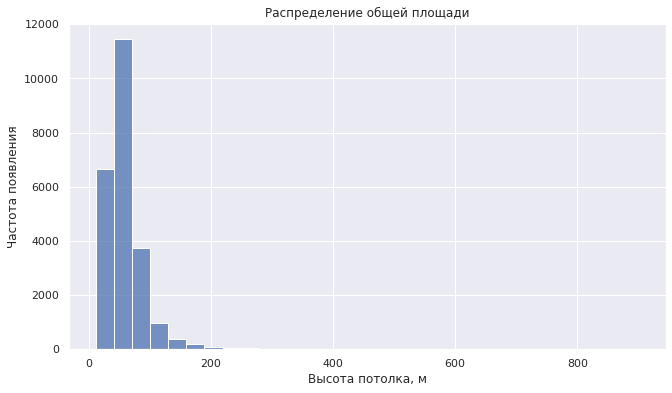

In [1470]:
ax = sns.histplot(data=df, 
                  x='total_area', 
                  bins=30)
ax.set(xlabel='Высота потолка, м', ylabel='Частота появления', title='Распределение общей площади')
plt.show()

Из описания данных мы помним, что 75% квартир меньше 70 квадратных метров, при этом максимальное значение - 900 квадратных метров. Выберем только площади квартир меньше 300 метров

In [1471]:
df = df.query('total_area < 250')

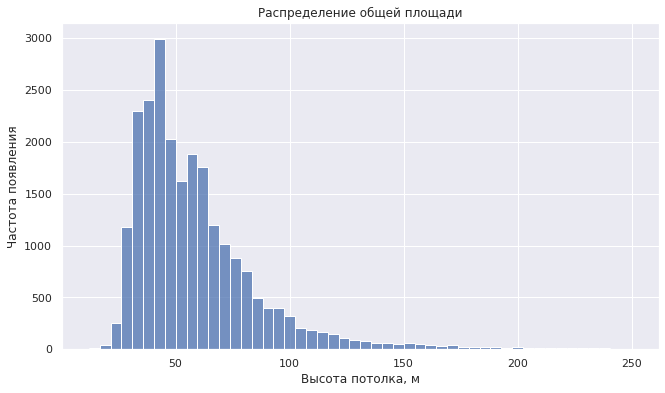

In [1472]:
ax = sns.histplot(data=df, 
                  x='total_area', 
                  bins=50)
ax.set(xlabel='Высота потолка, м', ylabel='Частота появления', title='Распределение общей площади')
plt.show()

Теперь гистограмма похожа на нормальное распределение с тяжелым хвостом. Наиболее популярная площадь продаваемых квартир чуть меньше 50 метров

Посмотрим теперь на гистограмму стоимости квартир

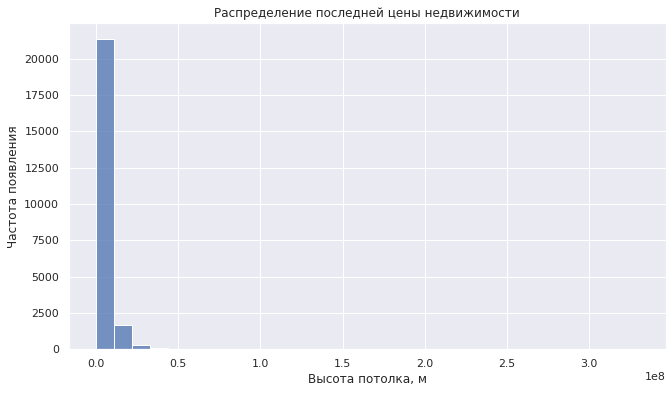

In [1473]:
ax = sns.histplot(data=df, 
                  x='last_price', 
                  bins=30)
ax.set(xlabel='Высота потолка, м', ylabel='Частота появления', title='Распределение последней цены недвижимости')
plt.show()

Видим, что экстремальные значения очень сильно искажают гистограмму, избавимся от части хвоста после 3e7

In [1474]:
df = df.query('last_price < 3e7')

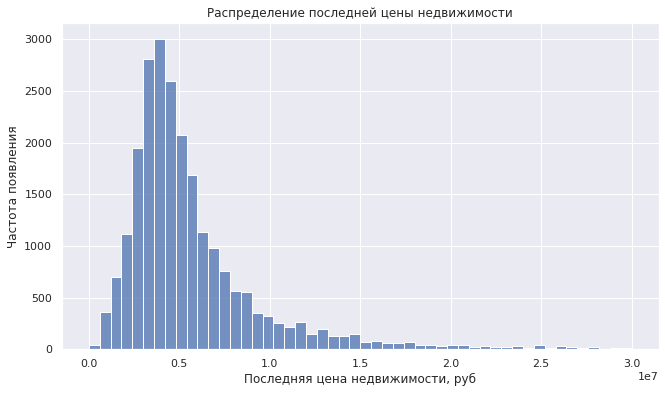

In [1475]:
ax = sns.histplot(data=df, 
                  x='last_price', 
                  bins=50)
ax.set(xlabel='Последняя цена недвижимости, руб', ylabel='Частота появления', title='Распределение последней цены недвижимости')
plt.show()

Наиболее популярная стоимость недвижимости составляет чуть менее 5 миллионов

Распределение стоимости недвижимости похоже на нормальное, но с тяжелым хвостом. Очень много достаточно дорогих квартир в разном ценовом диапазоне

Посмотрим теперь на гистограмму значений высоты потолков

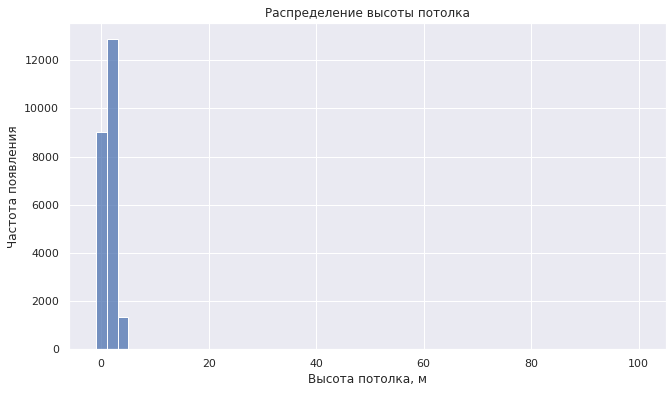

In [1476]:
ax = sns.histplot(data=df, 
                  x='ceiling_height', 
                  bins=50)
ax.set(xlabel='Высота потолка, м', ylabel='Частота появления', title='Распределение высоты потолка')
plt.show()

Избавимся от значений меньше 2 метров и выше 4

In [1477]:
df = df.query('2 < ceiling_height < 4')

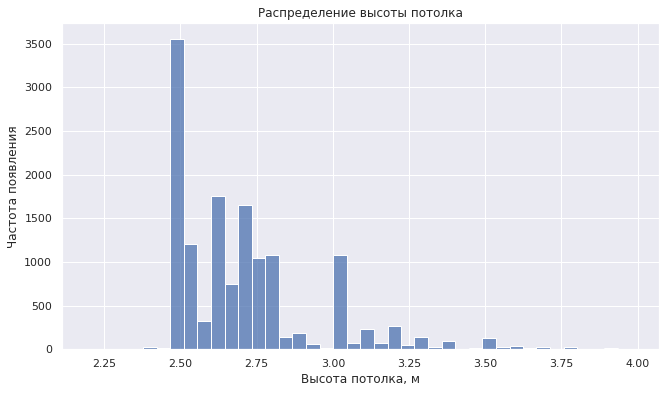

In [1478]:
ax = sns.histplot(data=df, 
                  x='ceiling_height', 
                  bins=40)
ax.set(xlabel='Высота потолка, м', ylabel='Частота появления', title='Распределение высоты потолка')
plt.show()

Самое часто встречающееся значение высоты потолка около 2.5 метров, так же есть несколько менее популярных значений высоты: 2.7, 3. И присутствует небольшое число квартир с различными редкими значениями высоты потолка.

Построим гистограмму значений числа комнат

In [1479]:
df['rooms'].value_counts()

2     4795
1     4581
3     3691
4      747
5      174
0       79
6       50
7       23
8        4
9        2
11       1
10       1
Name: rooms, dtype: int64

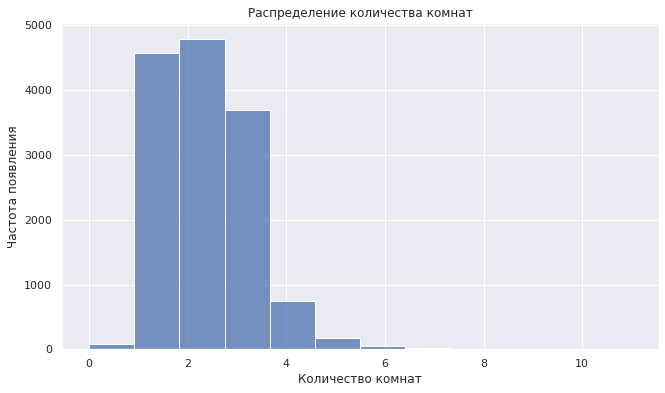

In [1480]:
ax = sns.histplot(data=df, 
                  x='rooms', 
                  bins=12)
ax.set(xlabel='Количество комнат', ylabel='Частота появления', title='Распределение количества комнат')
plt.show()

Уберем редкие значение числа комнат - более 6

In [1481]:
df = df.query('rooms < 7')

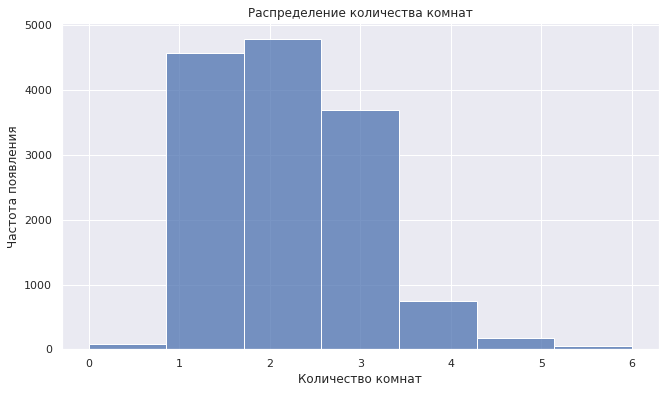

In [1482]:
ax = sns.histplot(data=df, 
                  x='rooms', 
                  bins=7)
ax.set(xlabel='Количество комнат', ylabel='Частота появления', title='Распределение количества комнат')
plt.show()

Посмотрим на квартиры с числом комнат равным нулю

In [1483]:
df.query('rooms == 0')['studio'].value_counts()

True     71
False     8
Name: studio, dtype: int64

In [1484]:
df.query('rooms == 0')['open_plan'].value_counts()

False    71
True      8
Name: open_plan, dtype: int64

Большинство квартир с числом комнат равным 0 - студии. И только 8 из них - квартиры со свободной планировкой.

Посмотрим на распределение времени размещения объявления на сайте до снятия

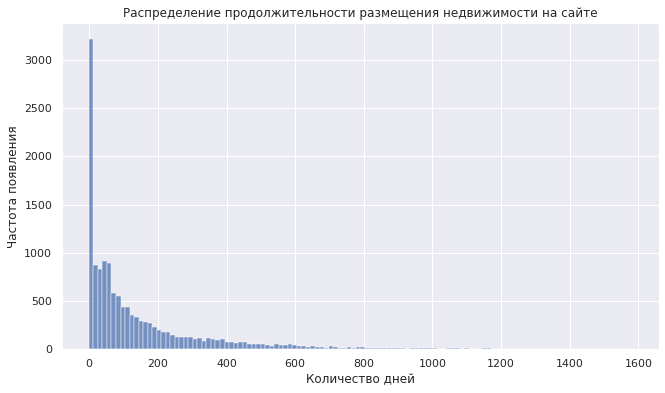

In [1485]:
ax = sns.histplot(data=df, 
                  x='days_exposition', 
                  bins=120)
ax.set(xlabel='Количество дней', ylabel='Частота появления', title='Распределение продолжительности размещения недвижимости на сайте')
plt.show()

Уберем объявления, срок размещения которы превышает 800 дней

In [1486]:
df = df.query('days_exposition < 800')

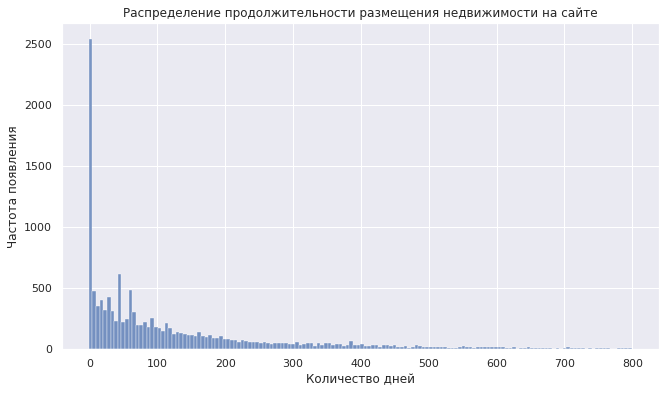

In [1487]:
ax = sns.histplot(data=df, 
                  x='days_exposition', 
                  bins=150)
ax.set(xlabel='Количество дней', ylabel='Частота появления', title='Распределение продолжительности размещения недвижимости на сайте')
plt.show()

Видим явные пики в периоде до 100 дней, посмотрим на них поближе

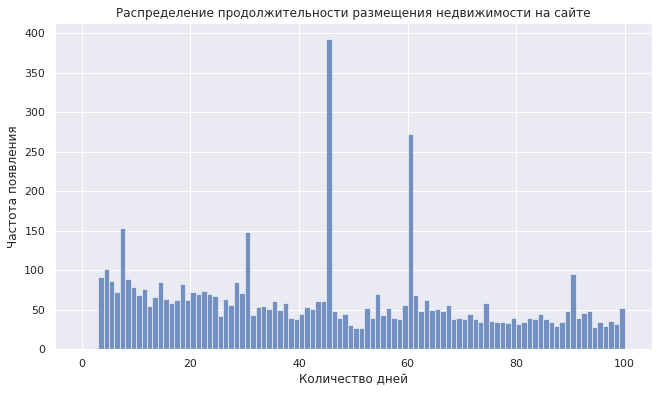

In [1488]:
ax = sns.histplot(data=df, 
                  x='days_exposition', 
                  bins=100,
                 binrange=(0, 100))
ax.set(xlabel='Количество дней', ylabel='Частота появления', title='Распределение продолжительности размещения недвижимости на сайте')
plt.show()

И ещё ближе

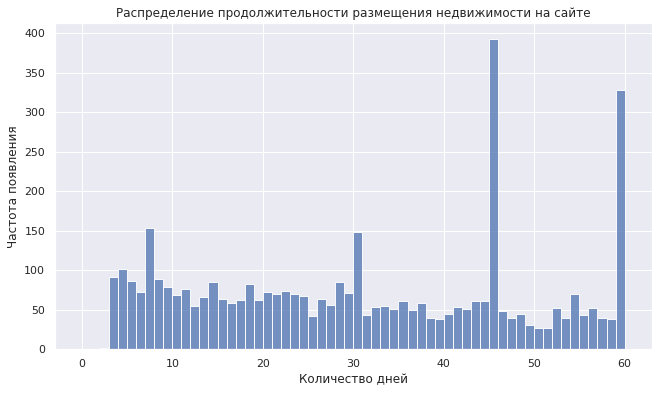

In [1489]:
ax = sns.histplot(data=df, 
                  x='days_exposition', 
                  bins=60,
                 binrange=(0, 60))
ax.set(xlabel='Количество дней', ylabel='Частота появления', title='Распределение продолжительности размещения недвижимости на сайте')
plt.show()

Видим явные пики на 30, 45 и 60 днях. А так же пик до 10 дней. Вполне вероятно, что значения 30, 45, 60 - это стандартное время размещения объявления по условим площадки. После окончания этого срока объявления не были размещены повторно, или же были проданы до окончания срока и были сняты автоматически после его окончания. Пик же до 10 дней больше похож на быструю продажу хороших предложений на рынке, но нет данных, позволяющих говорить об этом с уверенностью.

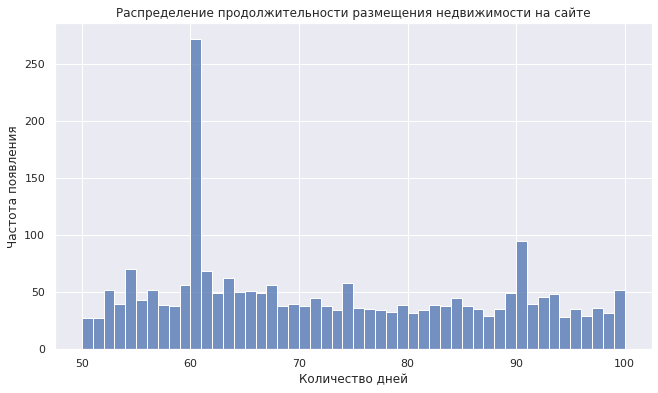

In [1490]:
ax = sns.histplot(data=df, 
                  x='days_exposition', 
                  bins=50,
                 binrange=(50, 100))
ax.set(xlabel='Количество дней', ylabel='Частота появления', title='Распределение продолжительности размещения недвижимости на сайте')
plt.show()

И небольшой пик присутствует на сроке 90 дней. Возможно, это так же связано с 15 или 30 дневным периодом размещением объявления на сайте

Посмотрим на медиану и среднее значение времени размещения объявления

In [1491]:
df['days_exposition'].describe()

count    13748.000000
mean       133.294661
std        165.008579
min         -1.000000
25%         16.000000
50%         67.000000
75%        184.000000
max        799.000000
Name: days_exposition, dtype: float64

Среднее значение почти в два раза отличается от медианного, это связано с тем, что есть обяъвления, время размещения которых больше нескольких месяцев

In [1]:
ax = sns.histplot(data=df, 
                  x='days_exposition', 
                  bins=30,
                 binrange=(0, 30))
ax.set(xlabel='Количество дней', ylabel='Частота появления', title='Распределение продолжительности размещения недвижимости на сайте')
plt.show()

NameError: name 'sns' is not defined

В целом, если продажи прошли быстрее чем за 2 месяца то такие продажи можно считать быстрыми, если же продажа произошла примерно за 2 недели или менее, то это очень быстрая продажа, таких продаж меньше 25% от всего числа объявлений. Необычно долгие продажи начинаются примерно с полугода, таких продаж 25% и длительность некоторых доходит до нескольких лет.

Посмотрим как некоторые параметры квартиры взаимосвязаны со стоимостью квартиры

In [1493]:
corr_data = df.query('cityCenters_nearest > 0')[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']]

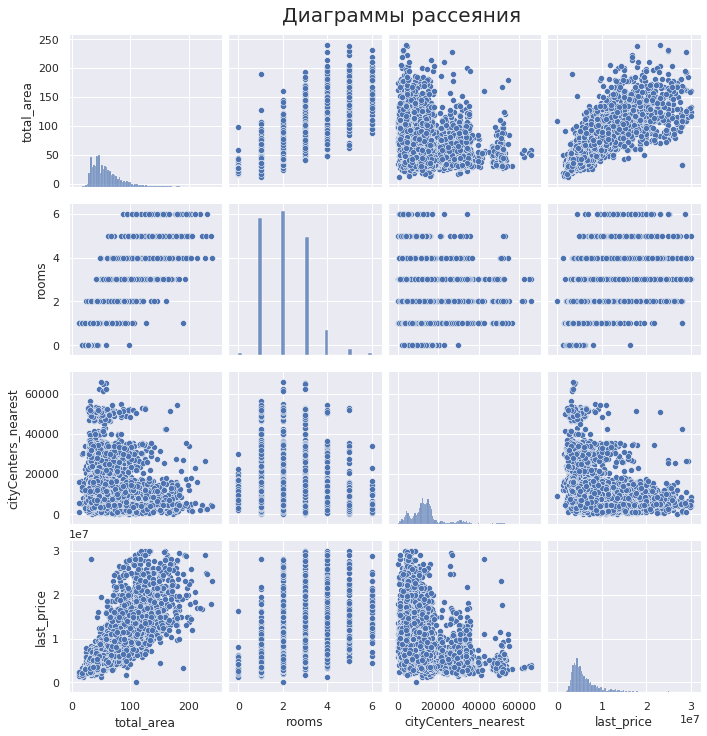

In [1494]:
ax = sns.pairplot(data=corr_data)
ax.fig.text(0.4, 1,'Диаграммы рассеяния', fontsize=20)
plt.show()

In [1495]:
corr_data.corr()

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.788484,-0.217518,0.815196
rooms,0.788484,1.000000,-0.152084,0.529425
cityCenters_nearest,-0.217518,-0.152084,1.000000,-0.338199
last_price,0.815196,0.529425,-0.338199,1.000000


Наиболее сильная положительная корреляция наблюдается между стоимостью квартиры и её площадью, средняя корреляция между стоимостью квартиры и числом комнат.

Отрицательная корреляция наблюдается между расстоянием до центра и ценой квартиры.

Добавим в данные колонку с годом размещения объявления

In [1496]:
df['exposition_year'] = df['first_day_exposition'].dt.year

А теперь посмотрим взаимосвязь стоимости квартиры с этажом и различными датами размещения - днем месяца, днем недели, месяцем и годом.

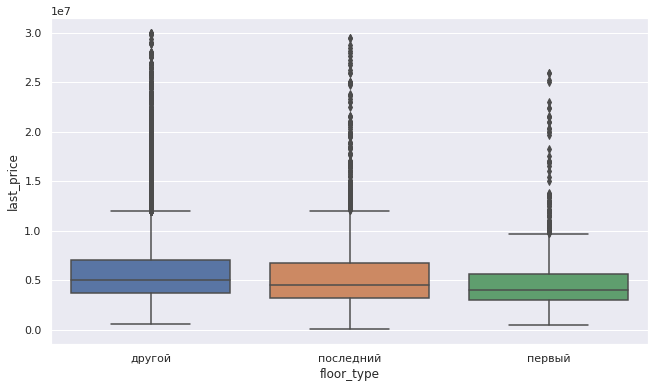

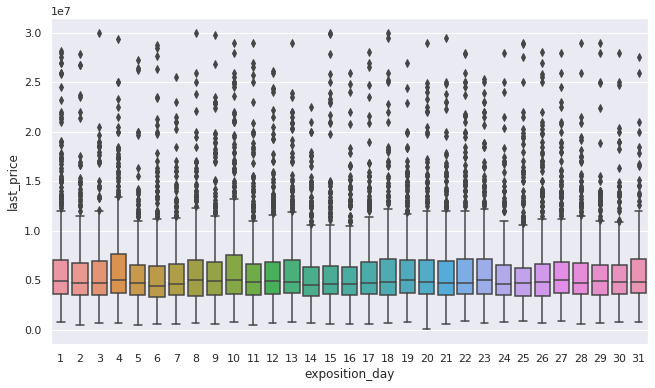

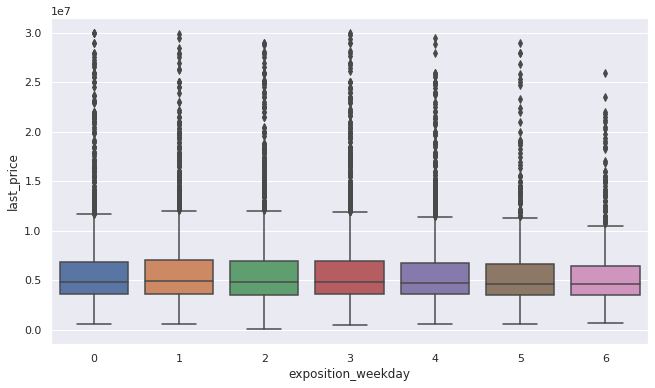

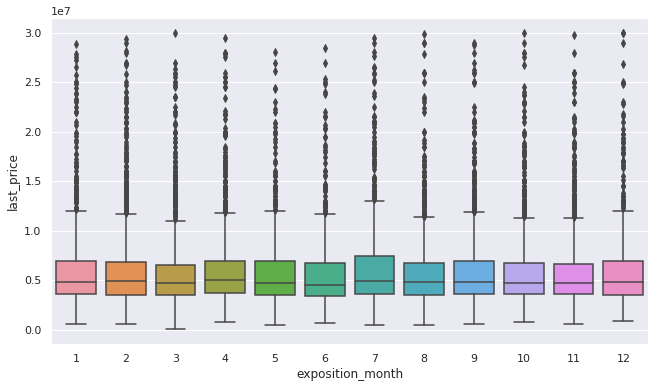

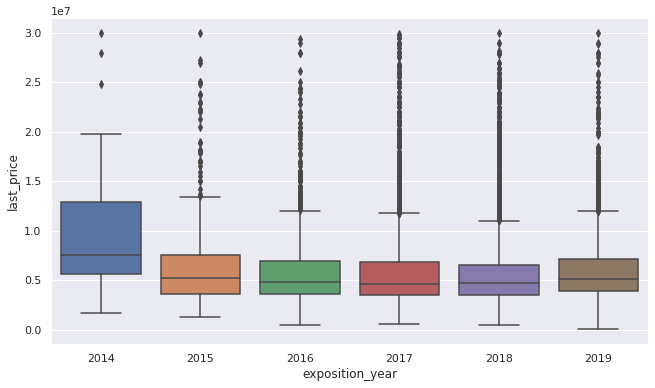

In [1497]:
box_plot_cols = ['floor_type', 'exposition_day', 'exposition_weekday', 'exposition_month', 'exposition_year']
for col in box_plot_cols:
    ax = sns.boxplot(x=col, 
                     y='last_price',
                     data=df)
    plt.show()

Видим, что нет сильной зависимости между ценой квартиры и временем её публикации - днем, днем недели, месяцем и годом. Только в 2014 году медианная цена была выше, возможно из-за числа объвлений. Убедимся в этом, построив сводную таблицу для года.

In [1498]:
year_pivot = pd.pivot_table(df, values='last_price', index='exposition_year', aggfunc=['count', 'median', 'mean'])
year_pivot.columns = ['Число квартир', 'Медиана', 'Среднее']
year_pivot

,Число квартир,Медиана,Среднее
exposition_year,,,
2014,40,7500000,9.790518e+06
2015,362,5200000,6.757762e+06
2016,1203,4800000,5.989712e+06
2017,4309,4650000,5.906221e+06
2018,5689,4690000,5.658835e+06
2019,2145,5150000,6.126582e+06


Видим, что квартиры на первом этаже дешевле чем квартиры на последнем или на любои этаже между ними. Проверим это, создав сводную таблицу по типа этажа

In [1499]:
floor_pivot = pd.pivot_table(df, values='last_price', index='floor_type', aggfunc=['count', 'median', 'mean'])
floor_pivot.columns = ['Число квартир', 'Медиана', 'Среднее']
floor_pivot

,Число квартир,Медиана,Среднее
floor_type,,,
другой,10066,4980000,6.119611e+06
первый,1735,4000000,4.672314e+06
последний,1947,4479300,5.712182e+06


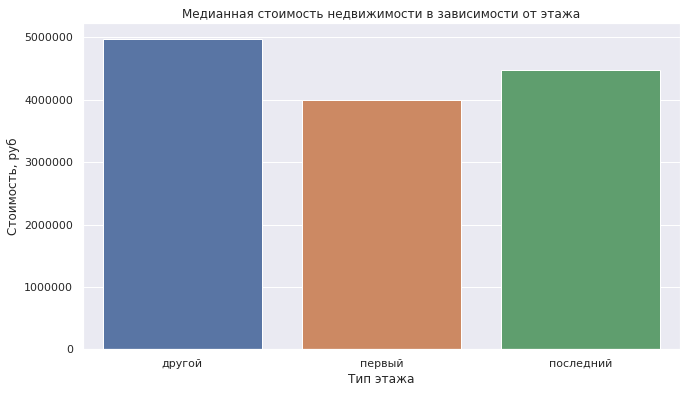

In [1500]:
ax = sns.barplot(data=floor_pivot, 
                  x=floor_pivot.index, 
                  y = 'Медиана',
                  dodge=False)
ax.set(xlabel='Тип этажа', ylabel='Стоимость, руб', title='Медианная стоимость недвижимости в зависимости от этажа')
plt.show()

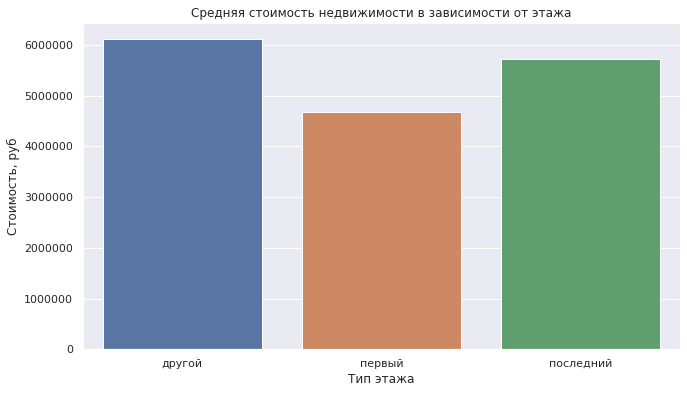

In [1501]:
ax = sns.barplot(data=floor_pivot, 
                  x=floor_pivot.index, 
                  y = 'Среднее',
                  dodge=False)
ax.set(xlabel='Тип этажа', ylabel='Стоимость, руб', title='Средняя стоимость недвижимости в зависимости от этажа')
plt.show()

И медианное и среднее значение cтоимости для квартир на первом этаже ниже, чем на любом другом.

Найдем 10 локаций с наибольшим числом объявлений. Посмотрим где наибольшая и где наименьшая средняя стоимость квадратного метра

In [1502]:
top_10 = pd.pivot_table(df, values='squared_meter_price', index='locality_name', aggfunc=['count', 'mean']).sort_values(by=('count', 'squared_meter_price'), ascending=False)[:10]
top_10.columns = ['Число объявлений', 'Средняя цена м^2']

In [1503]:
top_10

,Число объявлений,Средняя цена м^2
locality_name,,
санкт-петербург,9508,111276.648438
всеволожск,264,67276.843750
пушкин,224,103433.335938
мурино,219,87914.437500
поселок шушары,215,79453.015625
колпино,200,75903.539062
кудрово,188,96242.937500
гатчина,141,70622.210938
петергоф,139,84861.664062


In [1504]:
min_price = top_10['Средняя цена м^2'].idxmin(axis='columns')
max_price = top_10['Средняя цена м^2'].idxmax(axis='columns')
print(f'Город с самой высокой средней ценой квадратного метра: {max_price}')
print(f'Город с самой низкой средней ценой квадратного метра: {min_price}')

Город с самой высокой средней ценой квадратного метра: санкт-петербург
Город с самой низкой средней ценой квадратного метра: всеволожск


Проанализируем подробнее данные по недвижимости в Санкт-Петербурге и расстоянию от недвижимости до центра города.

In [1505]:
spb_locality = df.query('locality_name == "санкт-петербург"').copy()
spb_locality['center_dist_km'] = (spb_locality['cityCenters_nearest'] / 1000).round()

Посмотрим на среднее значение стоимости квадратного метра

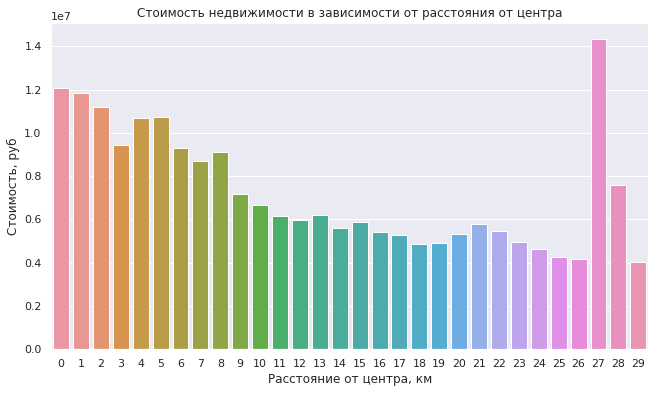

In [1506]:
mean_km_price = pd.pivot_table(spb_locality, values='last_price', index='center_dist_km', aggfunc='mean')
mean_km_price = mean_km_price.reset_index()
mean_km_price['center_dist_km'] = mean_km_price['center_dist_km'].astype('int64')

ax = sns.barplot(data=mean_km_price, 
                  x='center_dist_km', 
                  y = 'last_price')
ax.set(xlabel='Расстояние от центра, км', ylabel='Стоимость, руб', title='Стоимость недвижимости в зависимости от расстояния от центра')
plt.show()

Наибольшее изменение наблюдается между 8 и 9 км от центра. Все остальные значения достаточно либо слишком далеко от центра, либо разница не так существенна.

Проанализируем подробнее квартиры находящиеся в центре города

In [1507]:
spb_center = spb_locality.query('center_dist_km < 9')

Посмотрим на площадь квартир в центре города

In [1508]:
spb_center.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'squared_meter_price',
       'exposition_day', 'exposition_weekday', 'exposition_month',
       'floor_type', 'living_to_total', 'kitchen_to_total', 'exposition_year',
       'center_dist_km'],
      dtype='object')

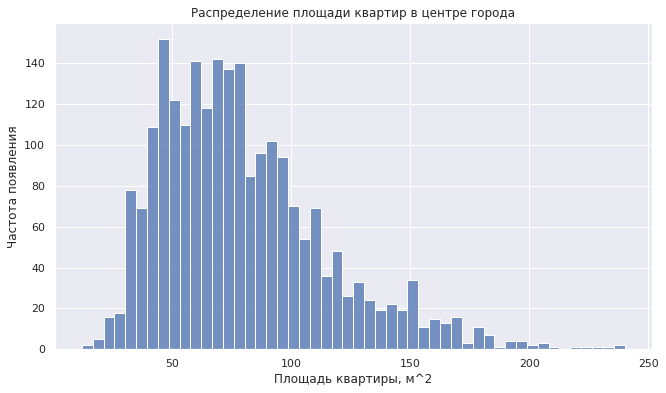

In [1509]:
ax = sns.histplot(data=spb_center, 
                  x='total_area', 
                  bins=50,)
ax.set(xlabel='Площадь квартиры, м^2', ylabel='Частота появления', title='Распределение площади квартир в центре города')
plt.show()

Видим что в центре города преобладают квартиры с площадью большей, чем 60 метров. Этот показатель выше, чем в у квартир в Санкт-Петербурге и области

Посмотрим на цену квартир в центре города

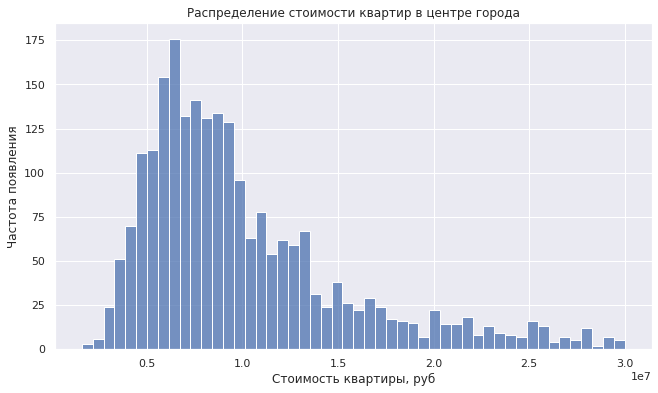

In [1510]:
ax = sns.histplot(data=spb_center, 
                  x='last_price', 
                  bins=50,)
ax.set(xlabel='Стоимость квартиры, руб', ylabel='Частота появления', title='Распределение стоимости квартир в центре города')
plt.show()

Достаточно логично, что в центре квартиры не только большей по площади, но и дороже.  В центре преобладают квартиры с ценой около 6 миллионов

Посмотрим на число комнат в квартирах в центре

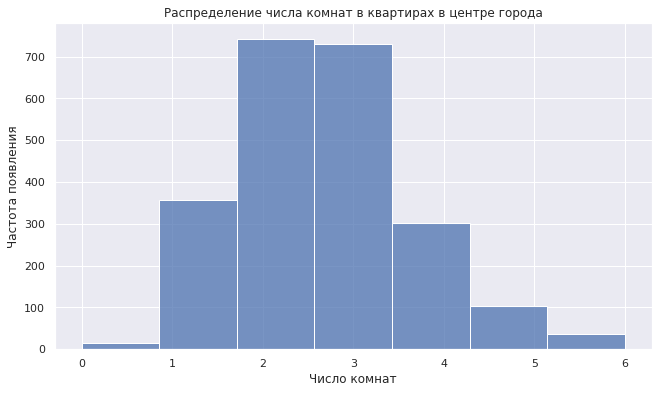

In [1511]:
ax = sns.histplot(data=spb_center, 
                  x='rooms', 
                  bins=7)
ax.set(xlabel='Число комнат', ylabel='Частота появления', title='Распределение числа комнат в квартирах в центре города')
plt.show()

При анализе данных по городу и области преобладали по количеству одно- и двухкомнатные квартиры. В центре же преобладают двух- и трехкомнатные квартиры.

Посмотрим на высоту потолка в квартирах в центре

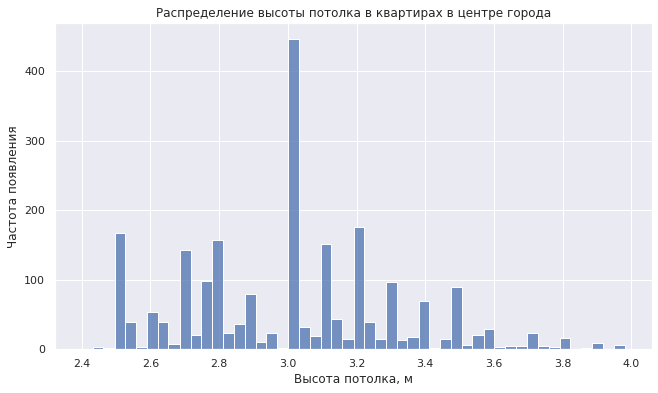

In [1512]:
ax = sns.histplot(data=spb_center, 
                  x='ceiling_height', 
                  bins=50)
ax.set(xlabel='Высота потолка, м', ylabel='Частота появления', title='Распределение высоты потолка в квартирах в центре города')
plt.show()

Видим, что в центре города преобладают квартиры с высоким потолком

Посмотрим на взаимосвязь параметров квартир в центре и их цены

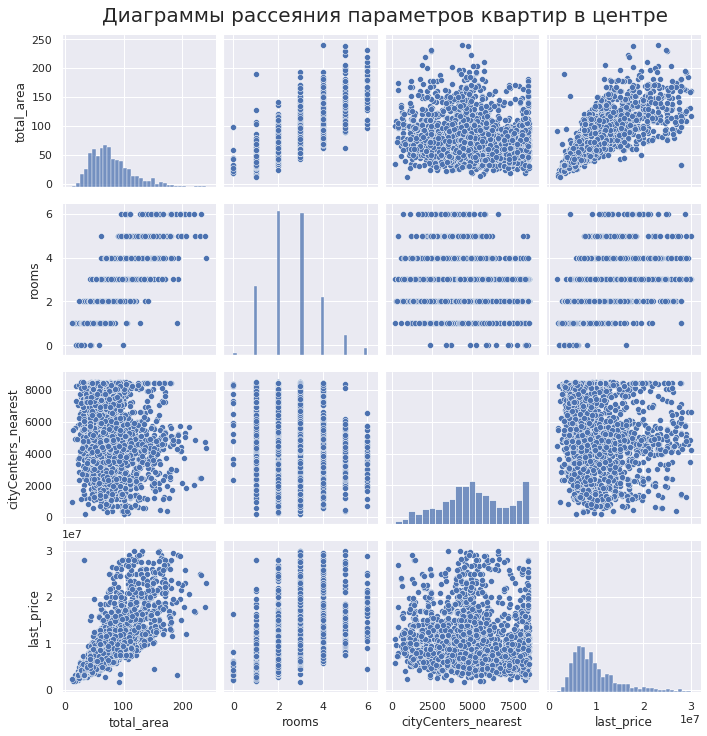

In [1513]:
corr_data_center = spb_center[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']]
ax = sns.pairplot(corr_data_center)
ax.fig.text(0.15, 1,'Диаграммы рассеяния параметров квартир в центре', fontsize=20)
plt.show()

In [1514]:
corr_data_center.corr()

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.790900,-0.195892,0.741466
rooms,0.790900,1.000000,-0.224390,0.457338
cityCenters_nearest,-0.195892,-0.224390,1.000000,-0.129425
last_price,0.741466,0.457338,-0.129425,1.000000


В сравнении с квартирами по городу и области уменьшилась корреляция между стоимостью и площадью, стоимостью и числом комнат. 
Так же почти в три раза уменьшилась отрицательная корреляция между расстоянием от центра и ценой квартиры. 

In [1515]:
spb_center['exposition_year'] = spb_center['first_day_exposition'].dt.year

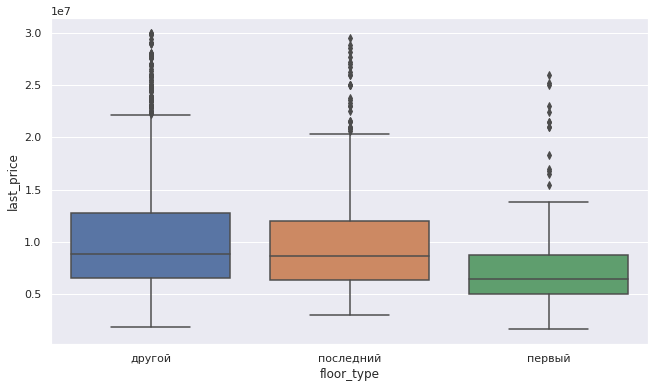

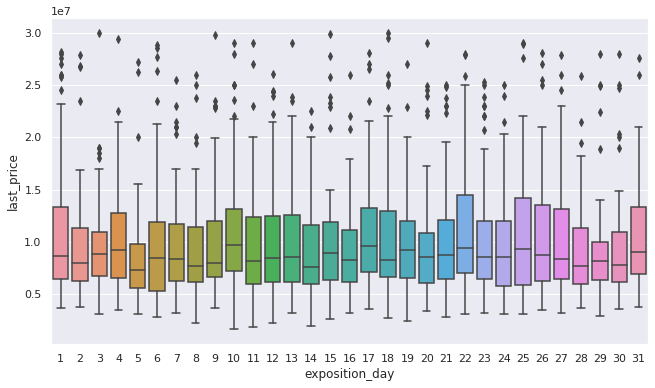

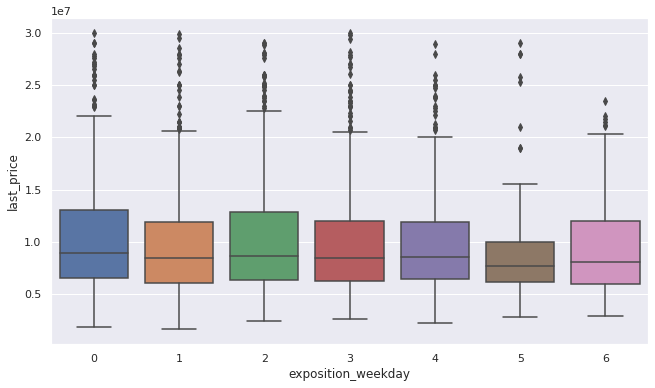

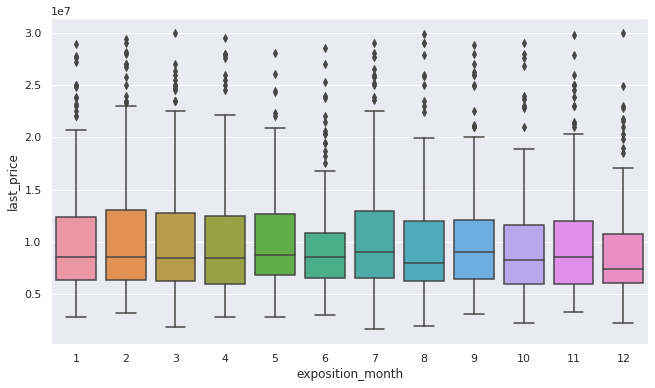

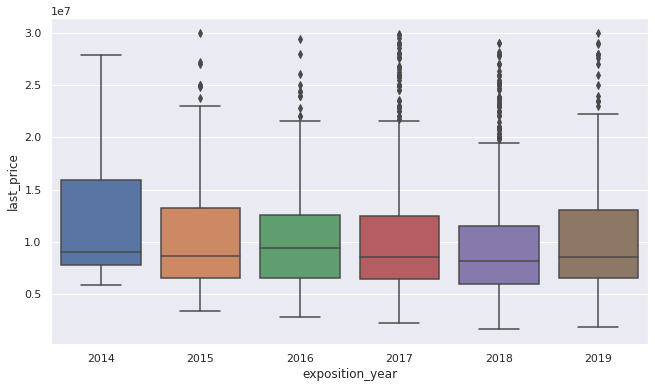

In [1516]:
box_plot_cols = ['floor_type', 'exposition_day', 'exposition_weekday', 'exposition_month', 'exposition_year']
for col in box_plot_cols:
    ax = sns.boxplot(x=col, 
                     y='last_price',
                     data=spb_center)
    plt.show()

Квартиры на первом этаже в центре так же дешевле чем на других этажах. По датам, дням недели и месяцам публикации сильных различий по стоимости нет. Проверим подробнее медианное значение для 2014 года. Самая дорогая медианная цена была в 2016 году.

In [1517]:
year_pivot = pd.pivot_table(spb_center, values='last_price', index='exposition_year', aggfunc=['count', 'median', 'mean'])
year_pivot.columns = ['Число квартир', 'Медиана', 'Среднее']
year_pivot

,Число квартир,Медиана,Среднее
exposition_year,,,
2014,10,9050000,1.234312e+07
2015,102,8650000,1.093244e+07
2016,243,9400000,1.032726e+07
2017,765,8580000,1.021442e+07
2018,846,8125000,9.538205e+06
2019,321,8500000,1.044602e+07


Все верно, ситуация аналогична анализу объявлений в Санкт-Петербурге и области.

## Общий вывод

По результатам обработки и анализа данных можно сказать следующее: 
* Необходимо обсудить причину появления большого числа пропусков не только в данных, вводимых пользователем вручную, но и данных, полученных автоматически на основе картографических данных. Стоит как-то обрабатывать случаи, когда нельзя определить расположение или количество прудов, аэропортов. 
* Возможно, необходимо как-то обратить внимание пользователей на заполнение колонок, в которых проблема с пропусками, если причина в ручном вводе клиентами.
* Необходимо обсудить типы данных, дабы избежать нерационального выделения памяти при больших объемах данных
* Город с самой высокой средней ценой квадратного метра: Санкт-Петербург
* Город с самой низкой средней ценой квадратного метра: Всеволожск
* Центром города Санкт-Петербург можно считать область с радиусом примерно 8 км
* Для объектов в СПб и области обнаружена сильная положительная корреляция между стоимостью и общей площадью недвижимости, между числом комнат и стоимость недвижимости, а также слабая отрицательная корреляция между расстоянием от центра и ценой недвижимости
* Для квартир в центре положительная корреляция между стоимостью и общей площадью недвижимости, между числом комнат и стоимость недвижимости ниже, как и отрицательная корреляция между расстоянием от центра и ценой недвижимости
* Для квартир в центре в сравнении с остальными квартирами характерно преобладание квартир:
    * большей стоимости
    * c большими числом комнат
    * большей площади
    * с большей высотой потолка
* Как для квартир в центре, так и для всех остальных квартир нет сильной зависимости между стоимостью квартиры и днем месяца, днем недели, месяцем, годом.
* Наиболее быстрые продажи квартир происходят за срок менее 16 дней
* Медианное время продажи квартиры - около двух месяцев
* Наиболее долгие продажи квартир начинаются от полугода и могут доходить до нескольких лет
* Необходимо уточнить время публикации объявления на сайте и проверить, есть ли связь с пиками в 45, 30, 60 и 90 дней
* Квартиры на первом этаже дешевле, чем на любом другом этаже, как в центре Санкт-Петербурга, так и за его пределами